In [ ]:
# Bu çalışmada kullanılan veri seti (heart.data.csv), 500 kasabadan oluşan hayali bir örnekleme aittir
# Veri setinde dört nitelik yer almaktadır.
# Bunlardan ilki örneklerin numarasını temsil eden ID alanı (Unnamed: 0),
# ikincisi her gün işe bisikletle giden insanların yüzdesi (bisikletKullanimi),
# üçüncüsü sigara içen insanların yüzdesi (sigaraDurum) 
# sonuncusu ise kalp hastalığı olan insanların yüzdesidir (kalpHastaligi)


# Bu çalışmanın amacı, her gün işe bisikletle giden insanların yüzdesi ve sigara 
# içen insanların yüzdesini kullanarak çoklu doğrusal regresyon modeli ile kalp hastalığı olan insanların yüzdesini tahmin etmektir.

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from matplotlib.cbook import boxplot_stats
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error, mean_absolute_error


In [4]:
# Veri Okuma
veriSeti=pd.read_csv("heart.data.csv")
veriSeti.head(6)

,Unnamed: 0,biking,smoking,heart.disease
0,1,30.801246,10.896608,11.769423
1,2,65.129215,2.219563,2.854081
2,3,1.959665,17.588331,17.177803
3,4,44.800196,2.802559,6.816647
4,5,69.428454,15.974505,4.062224
5,6,54.403626,29.333176,9.550046


In [5]:
veriSeti= veriSeti.iloc[:,1:4]

In [7]:
veriSeti=veriSeti.rename(columns={
    "biking" :"bisikletKullanimi",
    "smoking":"sigaraDurum",
    "heart.disease" :"kalpHastaligi"
})

veriSeti.describe()

,bisikletKullanimi,sigaraDurum,kalpHastaligi
count,498.000000,498.000000,498.000000
mean,37.788411,15.435034,10.174538
std,21.481519,8.289959,4.571874
min,1.119154,0.525850,0.551898
25%,20.204598,8.279776,6.513683
50%,35.824459,15.814614,10.385255
75%,57.852786,22.568925,13.724024
max,74.907111,29.946743,20.453496


<Axes: xlabel='kalpHastaligi', ylabel='bisikletKullanimi'>

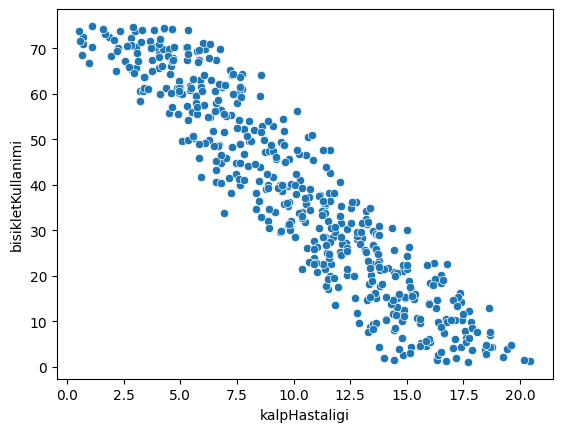

In [9]:
sns.scatterplot(x="kalpHastaligi",y="bisikletKullanimi",data=veriSeti)

<Axes: xlabel='kalpHastaligi', ylabel='sigaraDurum'>

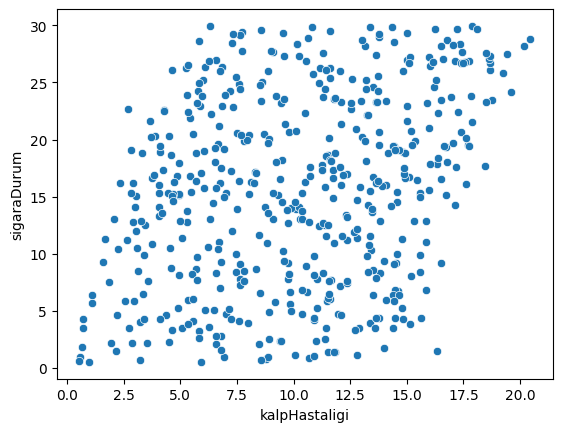

In [11]:
sns.scatterplot(x="kalpHastaligi",y="sigaraDurum",data=veriSeti)

<Axes: xlabel='bisikletKullanimi', ylabel='sigaraDurum'>

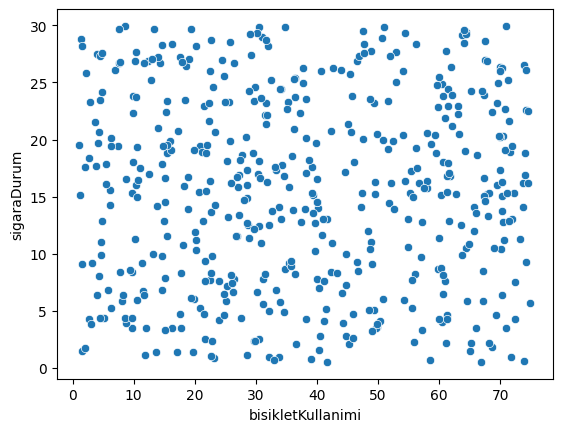

In [13]:
sns.scatterplot(x="bisikletKullanimi",y="sigaraDurum",data=veriSeti)

C:\Users\gokha\AppData\Local\Temp\ipykernel_16808\3621889415.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="kalpHastaligi",data=veriSeti,palette="summer")


[{'mean': 10.17453806796976,
  'iqr': 7.210341027356118,
  'cilo': 9.87798278557187,
  'cihi': 10.892526542427628,
  'whishi': 20.453496225445,
  'whislo': 0.551898154405674,
  'fliers': array([], dtype=float64),
  'q1': 6.513682578313207,
  'med': 10.38525466399975,
  'q3': 13.724023605669325}]

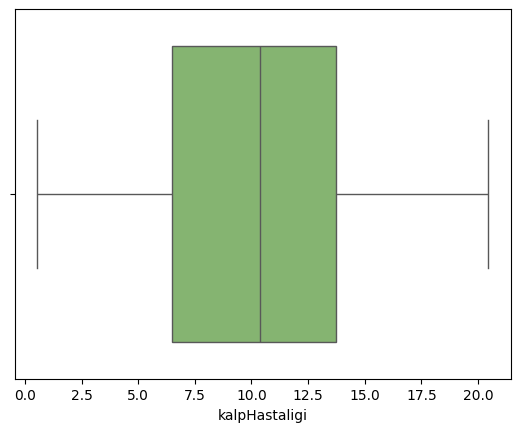

In [16]:
sns.boxplot(x="kalpHastaligi",data=veriSeti,palette="summer")
boxplot_stats(veriSeti.kalpHastaligi)

In [19]:
# Veri setinde eksik değer kontrolü yapılmış ancak herhangi bir eksik değere rastlanmamıştır.

print(veriSeti.isnull().sum())
veriSeti.describe()

bisikletKullanimi    0
sigaraDurum          0
kalpHastaligi        0
dtype: int64


,bisikletKullanimi,sigaraDurum,kalpHastaligi
count,498.000000,498.000000,498.000000
mean,37.788411,15.435034,10.174538
std,21.481519,8.289959,4.571874
min,1.119154,0.525850,0.551898
25%,20.204598,8.279776,6.513683
50%,35.824459,15.814614,10.385255
75%,57.852786,22.568925,13.724024
max,74.907111,29.946743,20.453496


In [24]:
pearsonr(veriSeti.kalpHastaligi,veriSeti.bisikletKullanimi)
pearsonr(veriSeti.kalpHastaligi,veriSeti.sigaraDurum)
pearsonr(veriSeti.bisikletKullanimi,veriSeti.sigaraDurum)

PearsonRResult(statistic=0.015136184529564913, pvalue=0.7361558942332667)

In [47]:
egıtım=veriSeti.sample(frac=0.7,replace=False,random_state=1)
ind=veriSeti.index.isin(egıtım.index)
test=veriSeti[~ind]
test

,bisikletKullanimi,sigaraDurum,kalpHastaligi
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
7,4.784604,12.835021,15.854654
10,51.825567,14.435118,6.430248
...,...,...,...
468,11.658029,26.734176,17.473940
481,33.262015,6.812130,10.372329
484,22.719661,1.024756,10.893894
491,68.884065,10.542996,3.109338


In [29]:
#Modelleme
lr_model=smf.ols(formula="kalpHastaligi ~ bisikletKullanimi + sigaraDurum",data=egıtım).fit()
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          kalpHastaligi   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     7670.
Date:                Sat, 08 Jun 2024   Prob (F-statistic):          2.71e-287
Time:                        17:37:12   Log-Likelihood:                -346.98
No. Observations:                 349   AIC:                             700.0
Df Residuals:                     346   BIC:                             711.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            14.9346      0.094    158.300      0.000      14.749      15.120
bisikletKullanimi    -0.1997      0.002   -119.859      0.000      -0.203      -0.196
sigaraDurum           0.1808      0.004     41.565      0.000       0.172       0.189
==============================================================================
Omnibus:                        0.866   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.649   Jarque-Bera (JB):                0.764
Skew:                          -0.114   Prob(JB):                        0.682
Kurtosis:                       3.028   Cond. No.                         119.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
lr_model.params

Intercept            14.934646
bisikletKullanimi    -0.199714
sigaraDurum           0.180831
dtype: float64

In [38]:
r_sq=lr_model.rsquared
print("Modelin r^2 degeri=%.2f" % r_sq)


Modelin r^2 degeri=0.98


In [42]:
kalpHastaliği_test1=lr_model.params["Intercept"] + lr_model.params["bisikletKullanimi"] * test.loc[1,"bisikletKullanimi"] + lr_model.params["sigaraDurum"] * test.loc[1,"sigaraDurum"]
kalpHastaliği_test1

2.328782771990067

In [48]:
lr_tahimler=lr_model.predict(test[["bisikletKullanimi","sigaraDurum"]])
test

,bisikletKullanimi,sigaraDurum,kalpHastaligi
1,65.129215,2.219563,2.854081
2,1.959665,17.588331,17.177803
3,44.800196,2.802559,6.816647
7,4.784604,12.835021,15.854654
10,51.825567,14.435118,6.430248
...,...,...,...
468,11.658029,26.734176,17.473940
481,33.262015,6.812130,10.372329
484,22.719661,1.024756,10.893894
491,68.884065,10.542996,3.109338


In [50]:
print("LR Modeli Tahminleri:",lr_tahimler.head(5),sep="\n")
print("Gerçek Değerler:",test.kalpHastaligi.head(5),sep="\n")

LR Modeli Tahminleri:
1      2.328783
2     17.723784
3      6.494200
7     16.300059
10     7.194658
dtype: float64
Gerçek Değerler:
1      2.854081
2     17.177803
3      6.816647
7     15.854654
10     6.430248
Name: kalpHastaligi, dtype: float64


In [ ]:
performansVerisi= pd.DataFrame(np.column_stack([test.kalpHastaligi,lr_tahimler]))
performansVerisi.columns=["y_test","y_tahminler"]